In [52]:
# set up the environment
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
sns.set()
import pandas as pd
import scipy as sp
import scipy.stats
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf
from arch.bootstrap import IIDBootstrap
import seaborn as sns

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/Users/kallus/Applications/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


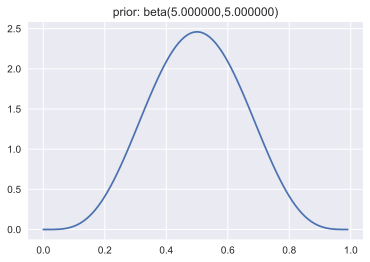

In [59]:
qrange = np.arange(0,1,.01)
a,b = 5,5
plot(qrange,sp.stats.beta.pdf(qrange,a=a,b=b))
_=title('prior: beta(%f,%f)'%(a,b))

In [61]:
2./7.

0.2857142857142857

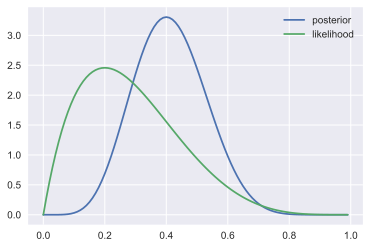

In [60]:
observations = [0,0,0,0,0,1,1]
plot(qrange,sp.stats.beta.pdf(qrange,a=a+sum(observations),b=b+len(observations)-sum(observations)),label='posterior')
plot(qrange,sp.stats.beta.pdf(qrange,a=sum(observations),b=len(observations)-sum(observations)),label='likelihood')
legend()

In [62]:
from ipywidgets import interact, interactive, fixed, interact_manual


In [64]:
@interact(a=(1,20),b=(1,20),H=(0,20),T=(0,20),CI=False)
def doplots(a,b,H,T,CI):
    plot(qrange,sp.stats.beta.pdf(qrange,a=a,b=b),label='prior')
    plot(qrange,sp.stats.beta.pdf(qrange,a=a+H,b=b+T),label='posterior')
    plot(qrange,sp.stats.beta.pdf(qrange,a=1+H,b=1+T),label='likelihood')
    legend()
    title('%d observations: %d H & %d T'%(H+T,H,T))
    if CI:
        axvline(x=sp.stats.beta.ppf(0.025,a=a+H,b=b+T),linestyle='--',color='g')
        axvline(x=sp.stats.beta.ppf(1-0.025,a=a+H,b=b+T),linestyle='--',color='g')
        phat = float(H)/float(T+H)
        se = phat*(1-phat)/sqrt(T+H)
        axvline(x=phat-1.96*se,linestyle='-.',color='r')
        axvline(x=phat+1.96*se,linestyle='-.',color='r')



A Jupyter Widget